In [101]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Import Linear Regression
from sklearn import linear_model
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)


In [4]:
#reading the CSV file into pandas dataframe
df=pd.read_csv('Concreate.csv')
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
#find the number of rows and columns
df.shape


(1030, 9)

In [6]:
#Check top few records of the dataset
df.head()
#All the records are numeric

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
#since columns name are complex lets change the name of columns
df.columns=['Cement','Blast','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate',
           'Age','Concreate Compressive Strength']
df.columns
# It shows that there are eight independent variables ( cement, slag, ash, water, superplasticizer, coarseagg, fineagg, age)  
#one dependent variable (Concreate Compressive Strength).


Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concreate Compressive Strength'],
      dtype='object')

In [9]:
#Check the last few records of the dataset
df.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concreate Compressive Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [10]:
#To show the detailed summary 
df.info()
#It gives the details about the number of rows (1030), number of columns (9), data types information 
#i.e. except age which is integer type all other columns are float type. 
#Memory usage is 72.5 KB. Also,there are no null values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                            1030 non-null float64
Blast                             1030 non-null float64
Fly Ash                           1030 non-null float64
Water                             1030 non-null float64
Superplasticizer                  1030 non-null float64
Coarse Aggregate                  1030 non-null float64
Fine Aggregate                    1030 non-null float64
Age                               1030 non-null int64
Concreate Compressive Strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
#lets check datatypes of columns
df.dtypes

Cement                            float64
Blast                             float64
Fly Ash                           float64
Water                             float64
Superplasticizer                  float64
Coarse Aggregate                  float64
Fine Aggregate                    float64
Age                                 int64
Concreate Compressive Strength    float64
dtype: object

In [14]:
#lets check null values
df.isnull().sum()

Cement                            0
Blast                             0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age                               0
Concreate Compressive Strength    0
dtype: int64

In [13]:
#Min and max value of cement
print('Range of values: ',df['Cement'].max(),'and',df['Cement'].min())

Range of values:  540.0 and 102.0


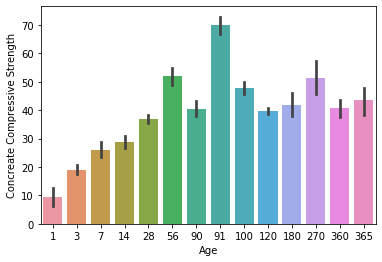

In [15]:
#lets check what is the average compressive strength grouped by age
sns.barplot(x='Age',y='Concreate Compressive Strength',data=df)
plt.show()

# Univarient Analysis

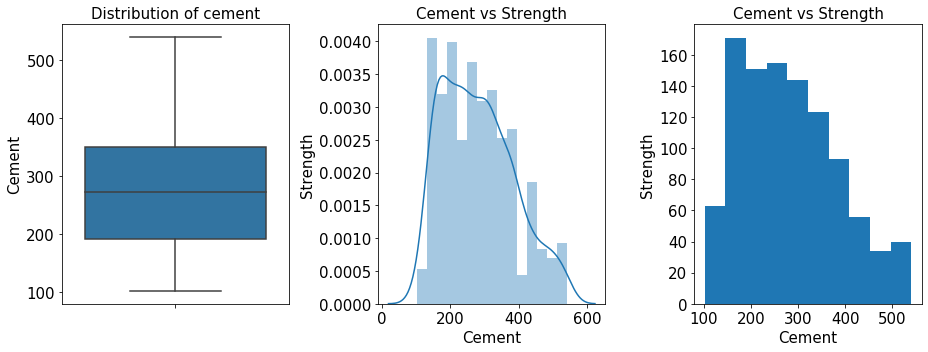

In [17]:
#relation of Cement and strength using boxplot and distplot and histogram
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

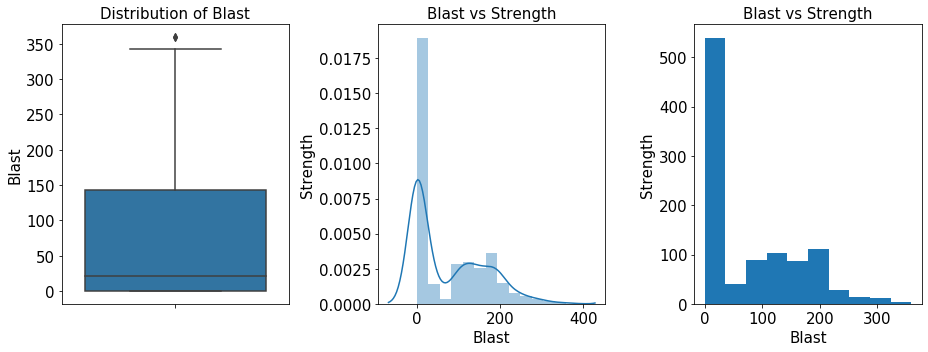

In [18]:
#relation of Blast and strength using boxplot and distplot and histogram

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Blast',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Blast', fontsize=15)
ax1.set_title('Distribution of Blast', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Blast'],ax=ax2)
ax2.set_xlabel('Blast', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Blast vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Blast'])
ax3.set_xlabel('Blast', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Blast vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

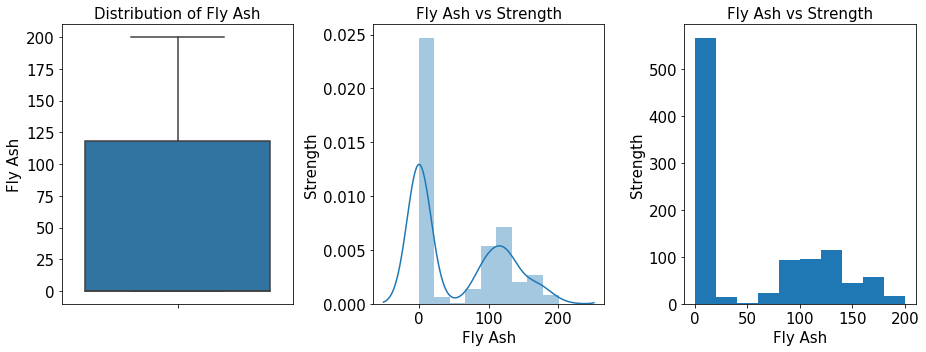

In [19]:
#relation of Fly Ash and strength using boxplot and distplot and histogram

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Fly Ash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fly Ash', fontsize=15)
ax1.set_title('Distribution of Fly Ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Fly Ash'],ax=ax2)
ax2.set_xlabel('Fly Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fly Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Fly Ash'])
ax3.set_xlabel('Fly Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fly Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

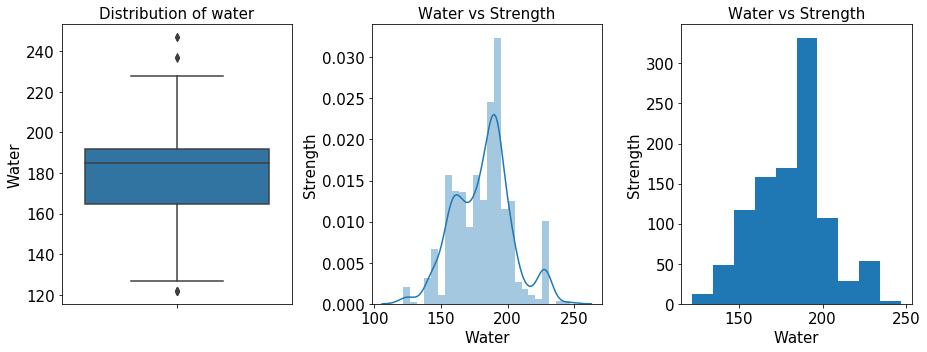

In [20]:
#relation of Water and strength using boxplot and distplot and histogram

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

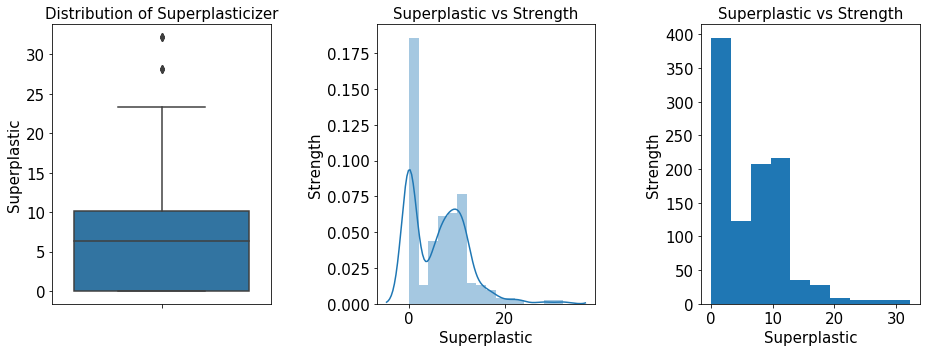

In [22]:
#relation of Superplasticizer and strength using boxplot and distplot and histogram
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Superplasticizer',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of Superplasticizer', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Superplasticizer'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Superplasticizer'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

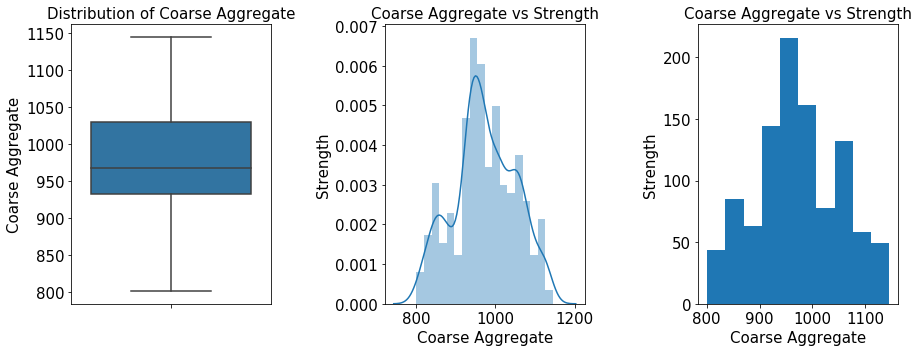

In [23]:
#relation of Coarse Aggregate and strength using boxplot and distplot and histogram

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Coarse Aggregate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarse Aggregate', fontsize=15)
ax1.set_title('Distribution of Coarse Aggregate', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Coarse Aggregate'],ax=ax2)
ax2.set_xlabel('Coarse Aggregate', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarse Aggregate vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Coarse Aggregate'])
ax3.set_xlabel('Coarse Aggregate', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarse Aggregate vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

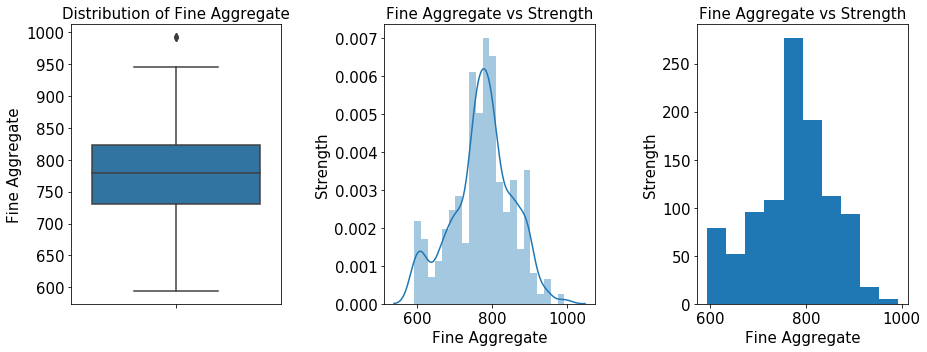

In [24]:
#relation of Fine Aggregate and strength using boxplot and distplot and histogram

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Fine Aggregate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fine Aggregate', fontsize=15)
ax1.set_title('Distribution of Fine Aggregate', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Fine Aggregate'],ax=ax2)
ax2.set_xlabel('Fine Aggregate', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fine Aggregate vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Fine Aggregate'])
ax3.set_xlabel('Fine Aggregate', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fine Aggregate vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

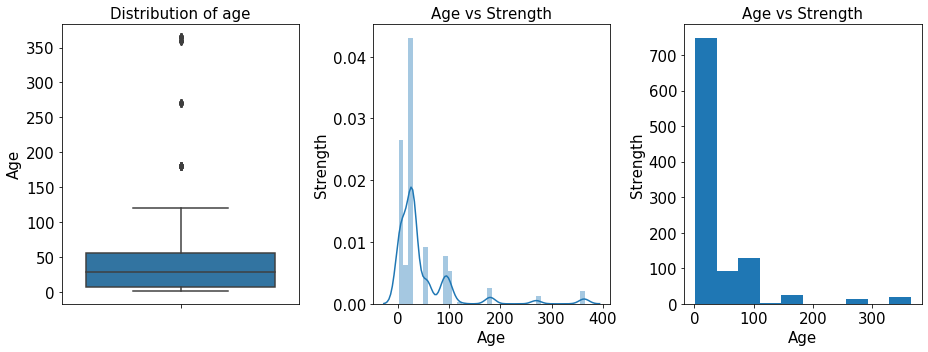

In [25]:
#relation of Age and strength using boxplot and distplot and histogram

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# Multivarient Analysis

Cement                               AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast                             AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash                            AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water                             AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer                  AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse Aggregate                        AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine Aggregate                       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                                   AxesSubplot(0.44569,0.125;0.133621x0.343182)
Concreate Compressive Strength       AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

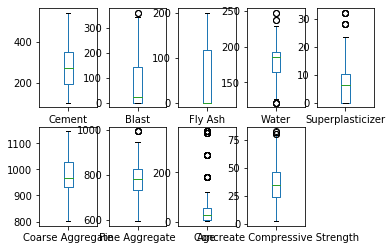

In [31]:
df.plot(kind='box',subplots=True,layout=(2,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000177E12B6748>,
      dtype=object)

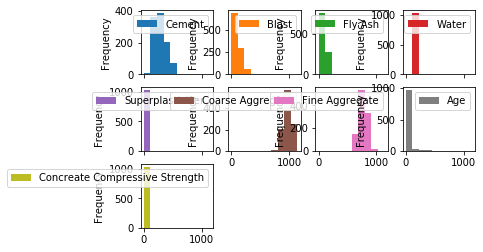

In [34]:
df.plot(kind='hist',subplots=True,layout=(3,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000177E1C2D808>,
      dtype=object)

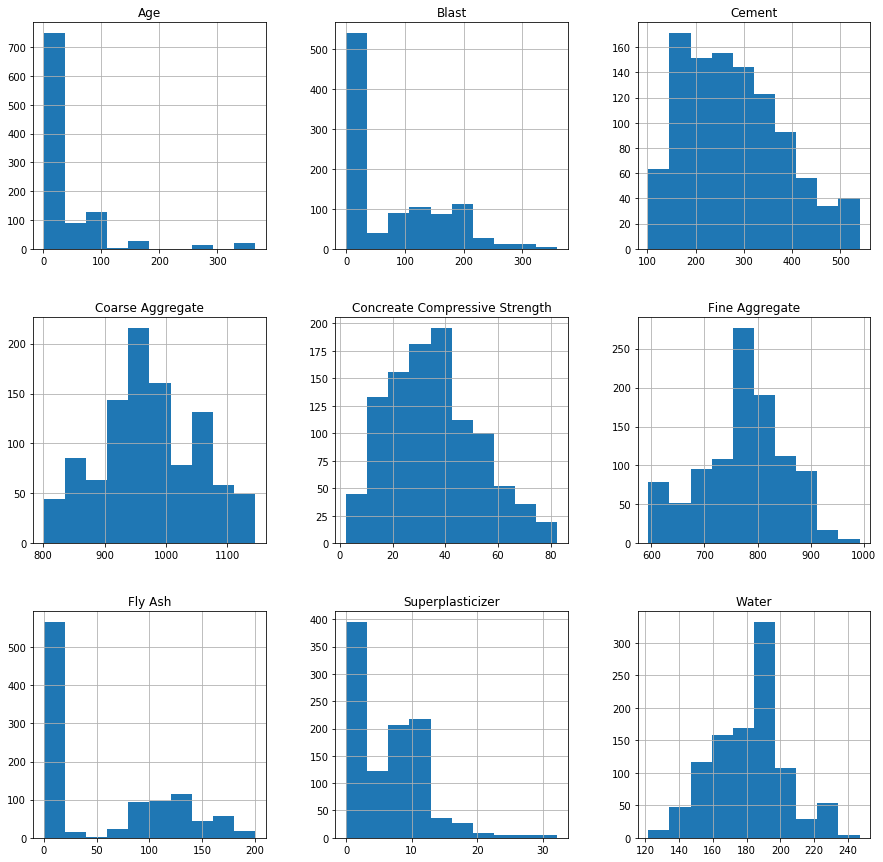

In [35]:
# Histogram 
df.hist(figsize=(15,15))

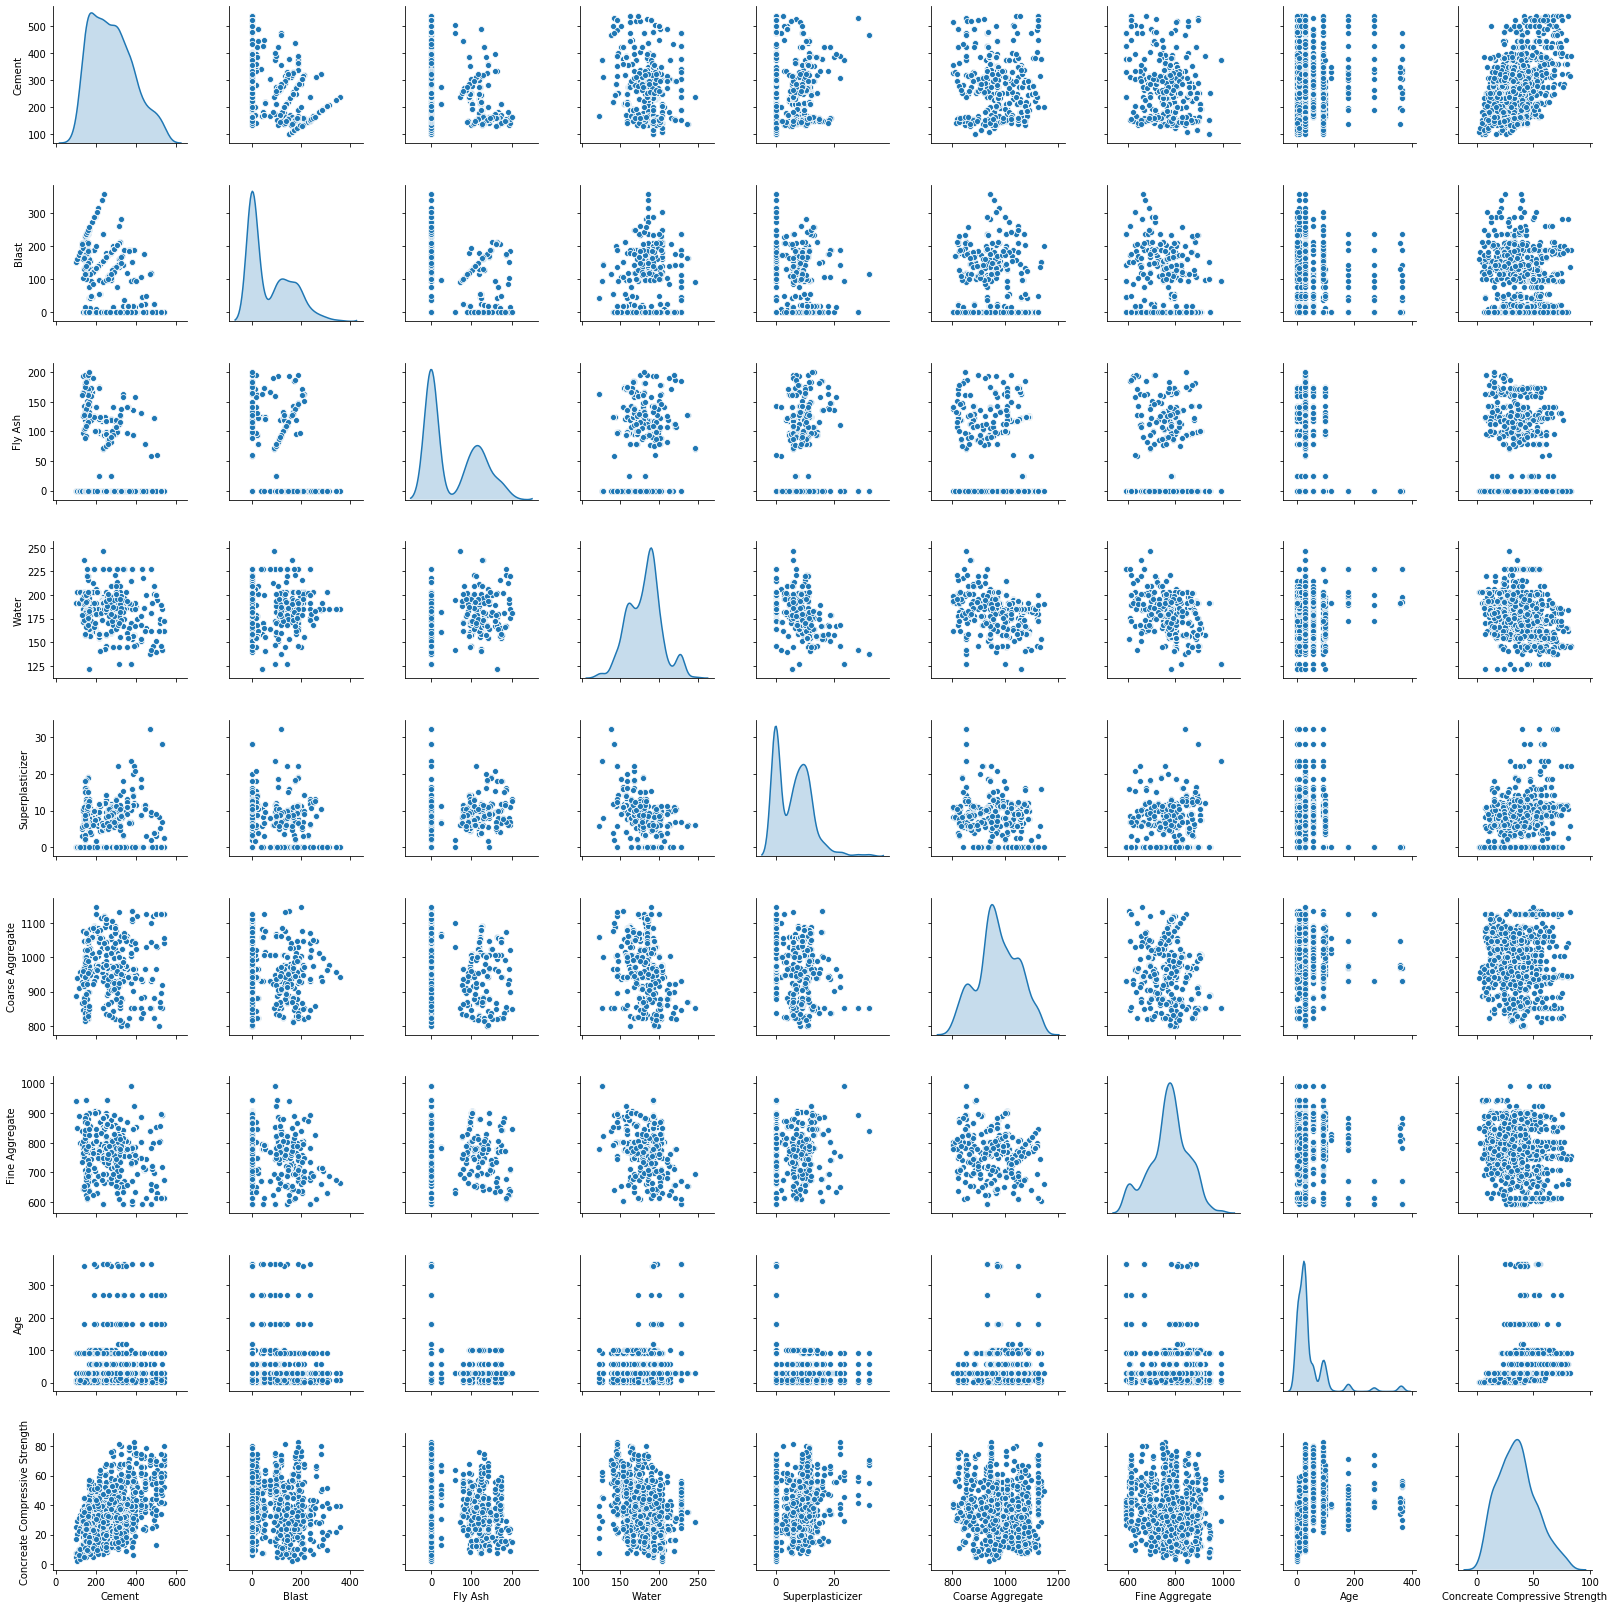

In [36]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df, diag_kind='kde')  

In [37]:
#lets check correlation matrix
df.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concreate Compressive Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concreate Compressive Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [39]:
#lets describe matrix
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concreate Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


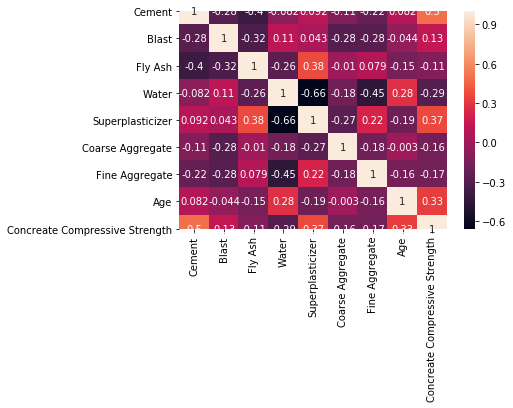

In [43]:
#heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
#lets check the skewness of dataset
df.skew()
#there are some skewness present and needs to treated

Cement                            0.509481
Blast                             0.800717
Fly Ash                           0.537354
Water                             0.074628
Superplasticizer                  0.907203
Coarse Aggregate                 -0.040220
Fine Aggregate                   -0.253010
Age                               3.269177
Concreate Compressive Strength    0.416977
dtype: float64

In [45]:
#removing skewness using log
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [46]:
#lets check again skewness
df.skew()

Cement                            0.509481
Blast                            -0.032700
Fly Ash                           0.537354
Water                             0.074628
Superplasticizer                 -0.324821
Coarse Aggregate                 -0.040220
Fine Aggregate                   -0.253010
Age                              -0.005085
Concreate Compressive Strength    0.416977
dtype: float64

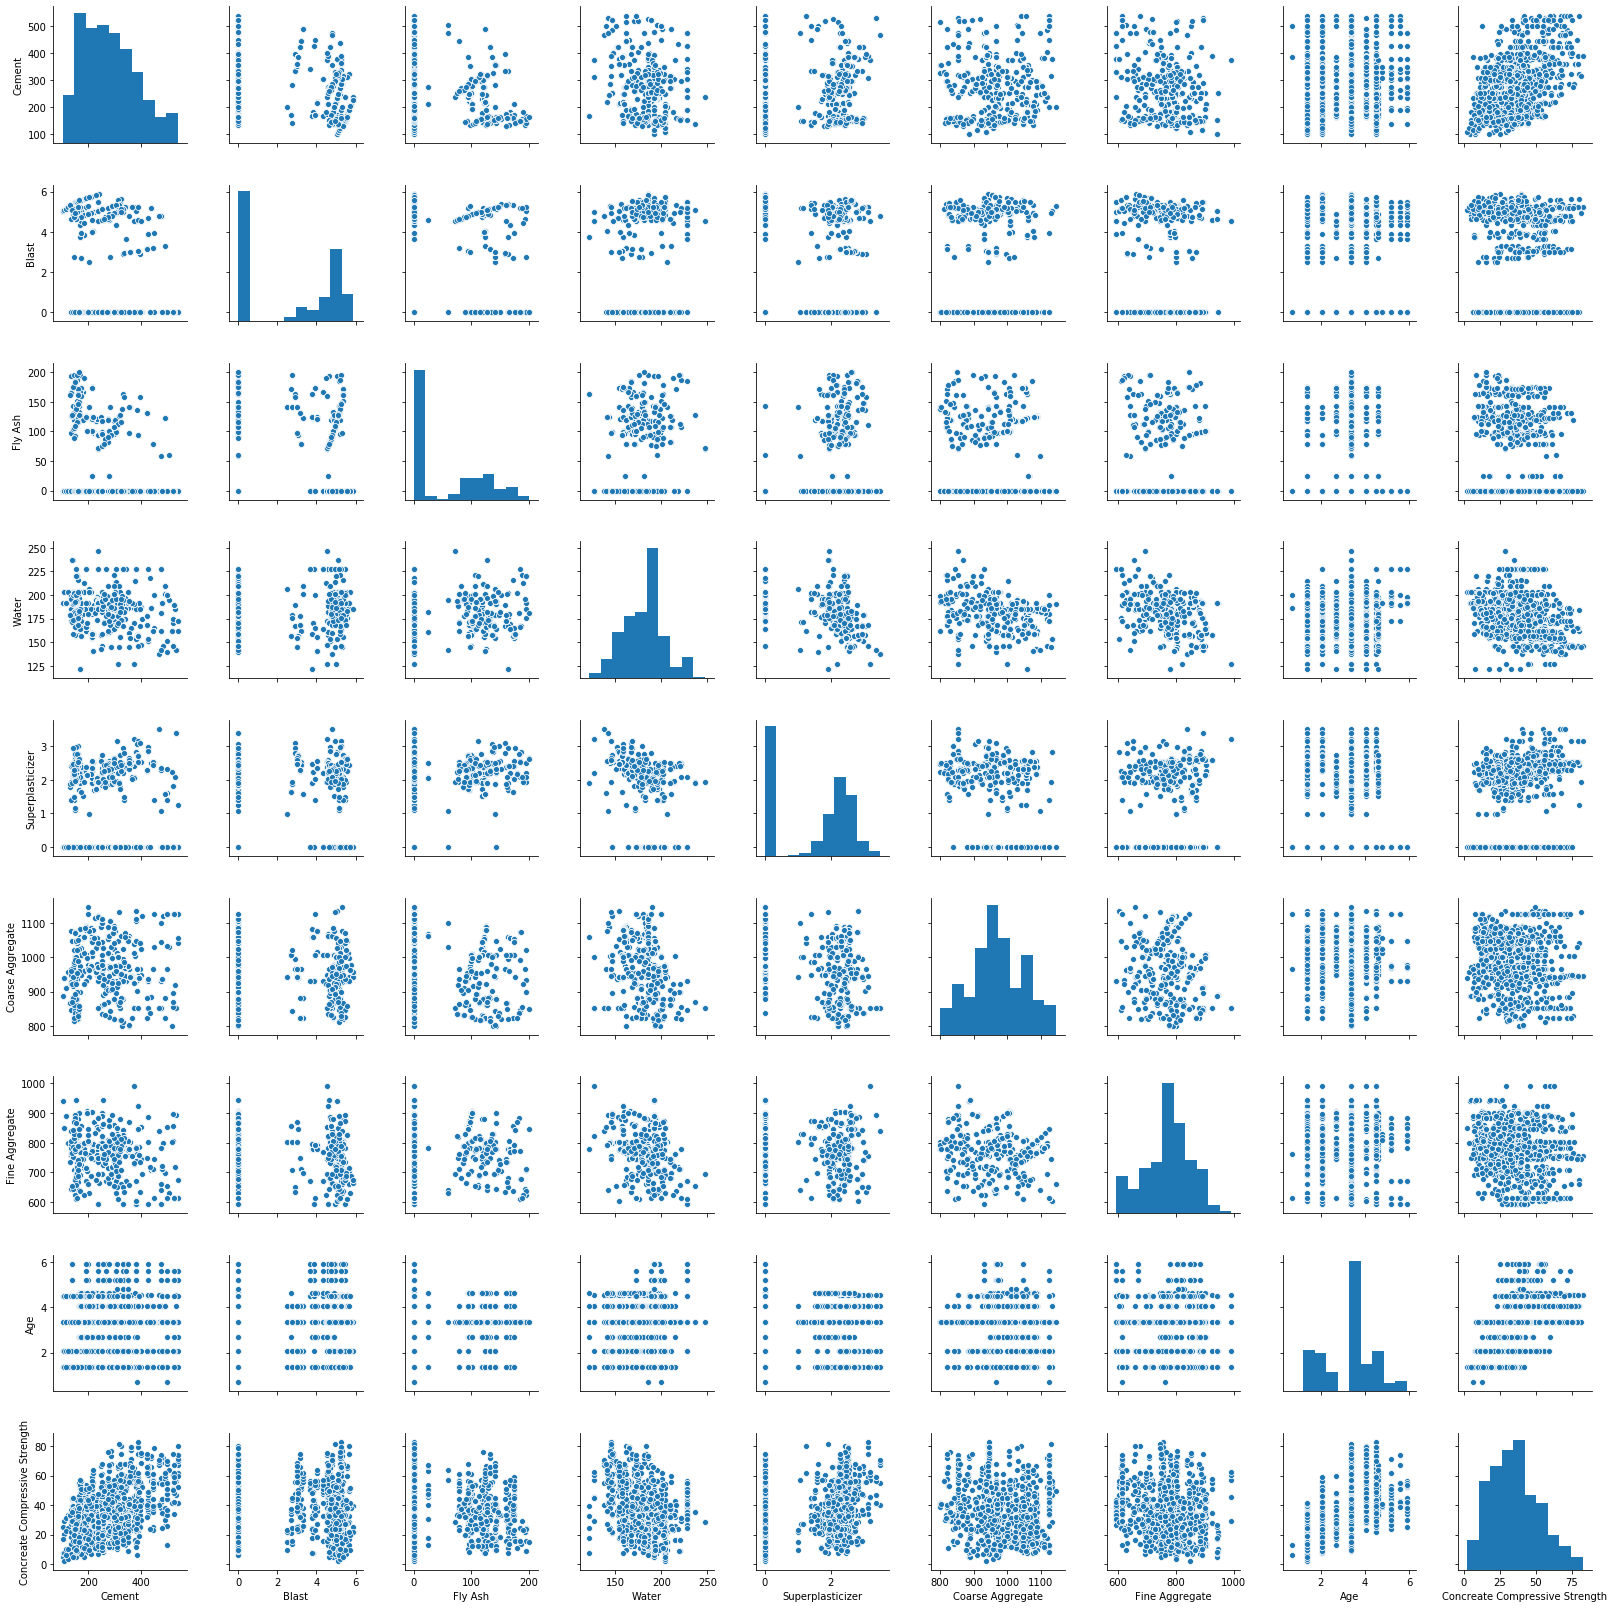

In [47]:
#lets check pairplot using seaborn library
sns.pairplot(df)
plt.show()

In [48]:
# lets check outlier
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)


(1030, 9)
(1028, 9)


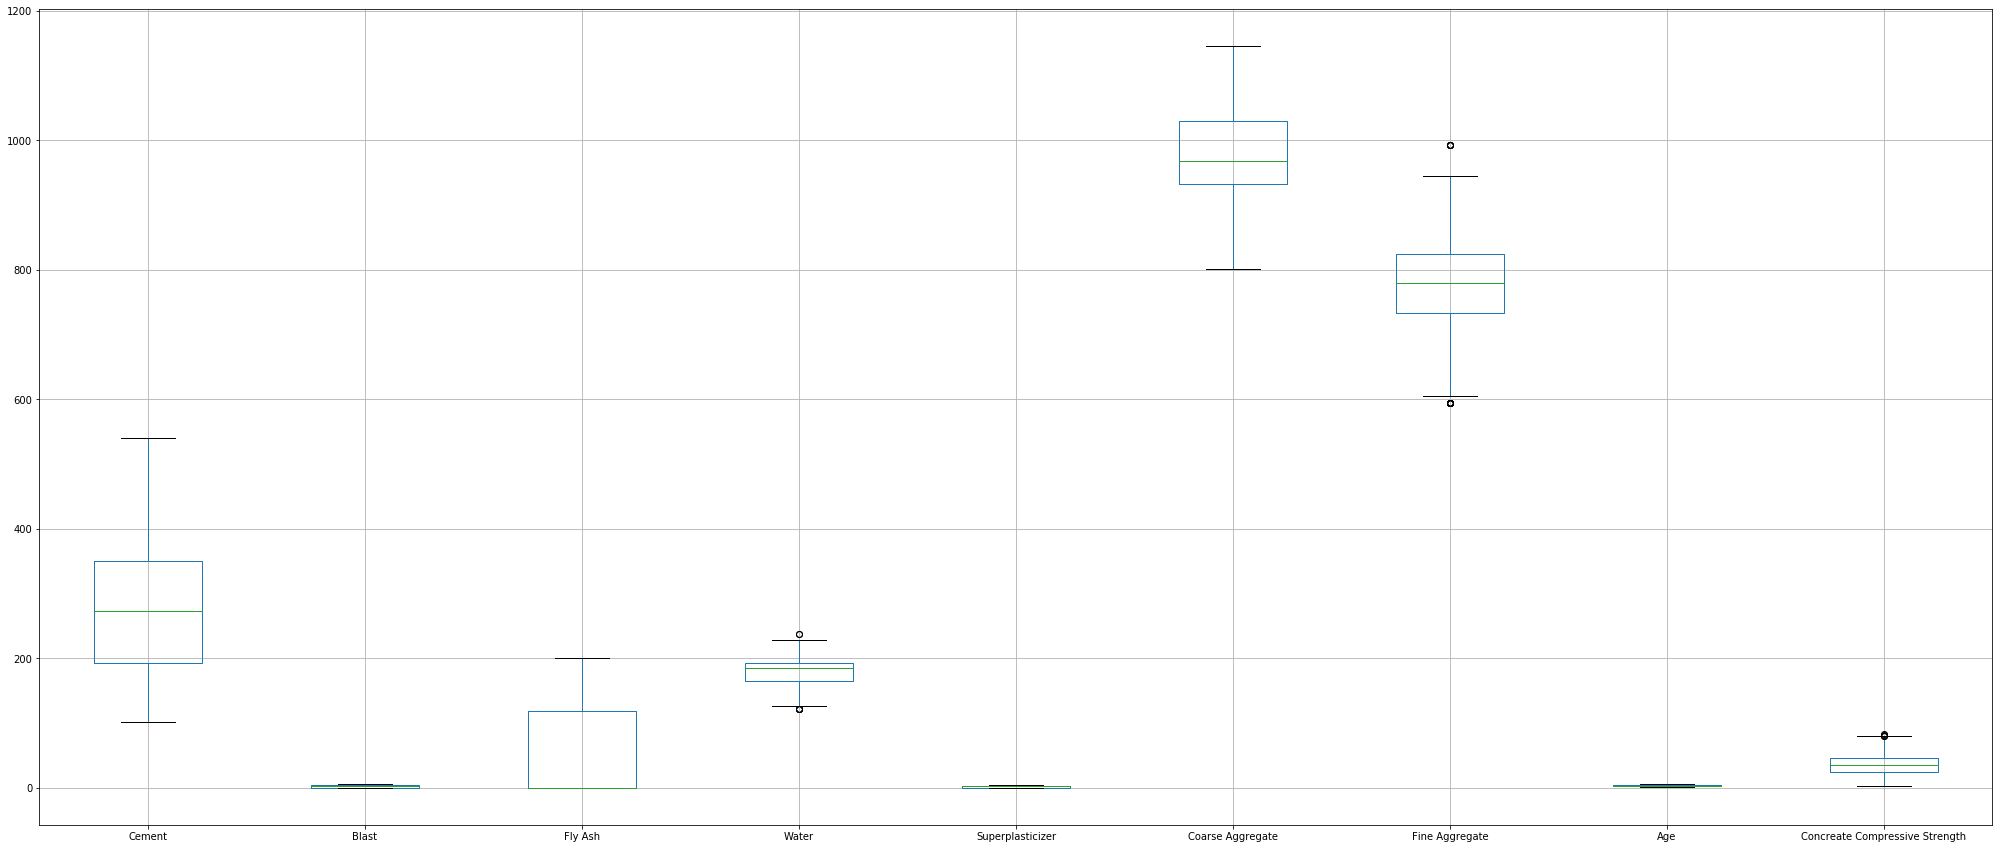

In [49]:
# again check for outliers in dataset after handling missing values using boxplot
df1.boxplot(figsize=(35,15))

In [85]:
#seprating target and input variables
df_x=df1.iloc[:,0:8]
df_x.shape


(1028, 8)

In [86]:
y=df1.iloc[:,-1].values
y.shape


(1028,)

In [87]:
y=y.reshape(-1,1)
y.shape

(1028, 1)

In [88]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(df_x)
x

array([[ 2.47511667, -1.05739275, -0.84586119, ...,  0.86131435,
        -1.2195237 ,  0.11281314],
       [ 2.47511667, -1.05739275, -0.84586119, ...,  1.05458536,
        -1.2195237 ,  0.11281314],
       [ 0.49021065,  1.00211518, -0.84586119, ..., -0.53023687,
        -2.24272945,  2.12443248],
       ...,
       [-1.26989878,  0.99305846,  0.8503859 , ..., -1.04047231,
         0.07820066,  0.11281314],
       [-1.16850117,  1.11346455, -0.84586119, ...,  0.21192379,
         0.18925592,  0.11281314],
       [-0.1947015 ,  0.8585166 ,  0.37712359, ..., -1.39995638,
        -0.15264454,  0.11281314]])

In [91]:
#x = df_x.apply(zscore)
x=pd.DataFrame(x,columns=df_x.columns,dtype='float64')
x

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.475117,-1.057393,-0.845861,-0.918341,-0.174129,0.861314,-1.219524,0.112813
1,2.475117,-1.057393,-0.845861,-0.918341,-0.174129,1.054585,-1.219524,0.112813
2,0.490211,1.002115,-0.845861,2.199472,-1.258377,-0.530237,-2.242729,2.124432
3,0.490211,1.002115,-0.845861,2.199472,-1.258377,-0.530237,-2.242729,2.394933
4,-0.790652,0.971850,-0.845861,0.498846,-1.258377,0.067615,0.645955,2.382551
...,...,...,...,...,...,...,...,...
1023,-0.046431,0.917451,0.564554,-0.086925,0.725778,-1.327802,-0.067793,0.112813
1024,0.391683,-1.057393,0.959720,0.687805,0.847879,-2.000385,0.494970,0.112813
1025,-1.269899,0.993058,0.850386,0.531914,0.438056,-1.040472,0.078201,0.112813
1026,-1.168501,1.113465,-0.845861,-0.275883,0.913644,0.211924,0.189256,0.112813


In [92]:
#again check skewness
x.skew()

Cement              0.506929
Blast              -0.029014
Fly Ash             0.538466
Water               0.037290
Superplasticizer   -0.322343
Coarse Aggregate   -0.042301
Fine Aggregate     -0.257366
Age                -0.004424
dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.20)

In [94]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2_scr=r2_score(y_test,predlr)
    print("r2_score corrosponding to random state :",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print("max r2 score corrosponding to:",final_r_state," is ",max_r_score)


r2_score corrosponding to random state : 42  is:  0.8157334390718877
r2_score corrosponding to random state : 43  is:  0.7799561816555318
r2_score corrosponding to random state : 44  is:  0.7956835400106808
r2_score corrosponding to random state : 45  is:  0.8045223943238069
r2_score corrosponding to random state : 46  is:  0.7925777179367486
r2_score corrosponding to random state : 47  is:  0.7932573063239552
r2_score corrosponding to random state : 48  is:  0.8226383192933098
r2_score corrosponding to random state : 49  is:  0.8257899315169119
r2_score corrosponding to random state : 50  is:  0.7764407729817846
r2_score corrosponding to random state : 51  is:  0.8159465669616908
r2_score corrosponding to random state : 52  is:  0.7748366186178586
r2_score corrosponding to random state : 53  is:  0.8178394566067204
r2_score corrosponding to random state : 54  is:  0.79799357917476
r2_score corrosponding to random state : 55  is:  0.8168961478936354
r2_score corrosponding to random sta

In [95]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.6613567398049393

In [96]:
#max r2 score we get at random state 56
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [97]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is :  0.8308115498902516
RMSE is : 7.061424236741105


In [102]:
#Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [105]:
from sklearn import metrics
y_pred = dt_model.predict(x_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))



Performance on training data using DT: 0.9952596786948118
Performance on testing data using DT: 0.898880642005895
Accuracy DT:  0.898880642005895
MSE:  29.802191383495142


* There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [130]:
import warnings
warnings.filterwarnings('ignore')
print(cross_val_score(dt_model,x,y,cv=10,scoring="r2").mean())
print(cross_val_score(dt_model,x,y,cv=10,scoring="r2").std())


0.41688738484675636
0.5145973609423964


In [123]:
#Random Forest Regressor
model=RandomForestRegressor(n_estimators=200,random_state=45)
model.fit(x_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=45, verbose=0,
                      warm_start=False)

In [124]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using RFR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9835595504974598
Performance on testing data using RFR: 0.939507192947365
Accuracy DT:  0.939507192947365
MSE:  17.82861609161497


* This model is also overfit.

In [128]:
#to reduce the problem of overfitting and underfitting we use cross_val_score technique
import warnings
warnings.filterwarnings('ignore')
print(cross_val_score(model,x,y,cv=10,scoring="r2").mean())
print(cross_val_score(model,x,y,cv=10,scoring="r2").std())

#73.5% accuracy far better than decision tree regressor


0.7357658728576885
0.13212351873455092


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [141]:
## Gradient Boosting Regressor
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
y_pred = gbr.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',gbr.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',gbr.score(x_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9907984535452907
Performance on testing data using GBR: 0.9559163612624987
Accuracy DT:  0.9559163612624987
MSE:  12.992458265137177


In [143]:
print(cross_val_score(gbr,x,y,cv=10,scoring="r2").mean())
print(cross_val_score(gbr,x,y,cv=10,scoring="r2").std())


0.7910082172549542
0.11868375419670361


In [144]:
#now lets use AdaBoost Regression algorithm
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf1=GridSearchCV(ada_reg,parameters,cv=5)
clf1.fit(x,y)
clf1.best_params_


{'learning_rate': 1, 'n_estimators': 500}

In [149]:
ada_reg=AdaBoostRegressor(learning_rate=1,n_estimators=500)
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
                  n_estimators=500, random_state=None)

In [152]:
y_pred = ada_reg.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',ada_reg.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',ada_reg.score(x_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.797473378087184
Performance on testing data using GBR: 0.7988862358798645
Accuracy DT:  0.7988862358798645
MSE:  59.27283367950964


In [153]:
print('Mean r2_score for Ada boosting regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Std. deviation in r2_score for Ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())
#not good model at all

Mean r2_score for Ada boosting regression: 0.45849540450341275
Std. deviation in r2_score for Ada boosting regression : 0.3484738083389037


# best model is linear regression having 83% accuracy

In [99]:
#lets save the model
from sklearn.externals import joblib
#save the model as pickle in a file
joblib.dump(lr,'Concreate.pkl')

['Concreate.pkl']